In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
import requests
import orjson 
import pandas as pd 
import polars as pl
from time import sleep

# x = requests.get('https://api.opendota.com/api/publicMatches', params={'less_than_match_id':7075980402})

In [3]:
# from tqdm import tqdm

# df = pl.read_parquet('../DATA/tmp_03.20.2023.10.08.35.parquet').to_pandas()
# SET = set()
# for idx, row in tqdm(df.iterrows()):
#     SET.update(row['winner_team'])
    
# TRANSFORM = {hero_id : idx + 1 for idx, hero_id in enumerate(list(SET))}
# TRANSFORM

In [4]:
df = pl.read_parquet('../DATA/tmp_04.23.2023.23.14.51.parquet')  # tmp_03.11.2023.03.58.04.parquet  
df = df.to_pandas()
df['avg_rank_tier'] = df['avg_rank_tier'].apply(lambda x: min(5, x // 10 - 1))
df['avg_rank_tier']
df = pl.from_pandas(df)
DICTS = df.to_dicts()

In [5]:
df  #  (2433383, 11)

match_id,match_seq_num,game_mode,start_time,duration,avg_rank_tier,avg_mmr,bans,winner_team,loser_team,radiant_won
i64,i64,i64,i64,i64,i64,f64,str,list[i64],list[i64],bool
7122495812,5983460406,22,1682291924,1394,2,3130.0,null,"[67, 79, … 2]","[1, 63, … 80]",false
7122494413,5983459057,22,1682291779,1408,3,2234.0,null,"[40, 43, … 12]","[88, 135, … 34]",true
7122497312,5983460085,22,1682292069,1197,2,null,null,"[42, 45, … 94]","[27, 104, … 47]",false
7122494606,5983459115,22,1682291808,1378,5,3502.0,null,"[57, 40, … 66]","[30, 13, … 105]",false
7122496209,5983460222,22,1682291965,1350,2,3417.0,null,"[36, 111, … 18]","[70, 40, … 23]",false
7122493704,5983460241,22,1682291724,1576,3,2571.0,null,"[64, 108, … 32]","[105, 96, … 111]",true
7122496201,5983460641,4,1682291965,1406,4,1948.0,null,"[84, 36, … 126]","[96, 39, … 1]",false
7122494902,5983459013,22,1682291828,1340,3,null,null,"[77, 138, … 66]","[63, 39, … 104]",true
7122494112,5983459669,4,1682291764,1506,2,1306.0,null,"[85, 47, … 58]","[17, 54, … 76]",false


In [6]:
df['game_mode'].value_counts()

game_mode,counts
i64,u32
1,5
2,1939
3,56215
4,69464
16,26
22,1632567


In [7]:
TEST_DICTS = DICTS[-len(DICTS) // 10:]
TRAIN_DICTS = DICTS[:-len(DICTS) // 10]
len(TRAIN_DICTS), len(TEST_DICTS)

(1584194, 176022)

In [8]:
from picker.model.dataset import TeamDataset

In [9]:
# from tqdm import tqdm

# df = pl.read_parquet('../DATA/tmp_03.20.2023.10.08.35.parquet').to_pandas()
# SET = set()
# for idx, row in tqdm(df.iterrows()):
#     SET.update(row['winner_team'])
    
# TRANSFORM = {hero_id : idx + 1 for idx, hero_id in enumerate(list(SET))}
# TRANSFORM

In [10]:
train_data = TeamDataset('', dicts_override=TRAIN_DICTS, p=0.2)
test_data1 = TeamDataset('', dicts_override=TEST_DICTS, p=0.0)
test_data2 = TeamDataset('', dicts_override=TEST_DICTS, p=0.2)

In [11]:
from picker.model.training_model import run_training
from picker.model.transformer import TransformerModel
from picker.model.constants import HERO_TRANSFORM

In [12]:
# embedding_dict = {'team': [len(HERO_TRANSFORM) + 1, 15], 'enemy': [len(HERO_TRANSFORM) + 1, 32]} 
embedding_dict = {'team': [len(HERO_TRANSFORM) + 1, 32 - 3 - 1], 'rank': [6, 3]} 
model = TransformerModel(embedding_dict=embedding_dict, num_heads=8, num_layers=6,)

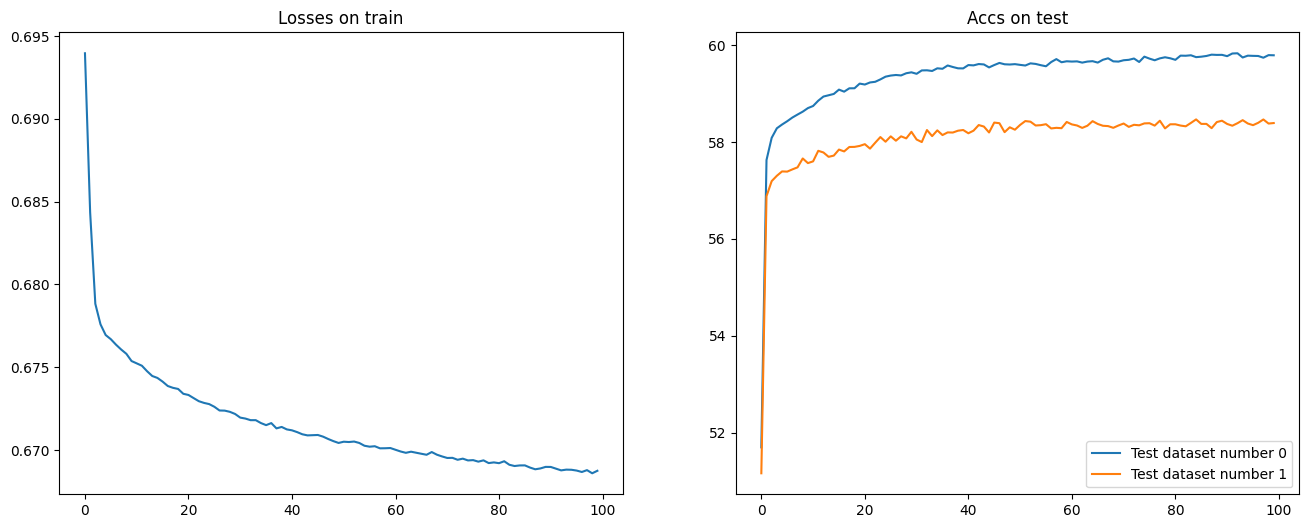

saved model to `trans-32-0.2-v2.pth`


In [13]:
from torch.nn import BCELoss, CrossEntropyLoss
import torch

run_training(model=model, name='trans-32-0.2-v2', train_data=train_data, test_datas=[test_data1, test_data2],
             optimizer=torch.optim.Adam(model.parameters(), lr=3e-4),
             criterion=CrossEntropyLoss(),
             epochs=100, batch_size=1024 * 8, device='cuda:1')

In [14]:
import torch 
from picker.model.transformer import TransformerModel
from picker.model.constants import HERO_TRANSFORM

embedding_dict = {'team': [len(HERO_TRANSFORM) + 1, 32 - 3 - 1], 'rank': [6, 3]} 
model = TransformerModel(embedding_dict=embedding_dict, num_heads=8, num_layers=6,)
model.load_state_dict(torch.load('trans-32-0.2-v2.pth'))

model.to('cpu')
model.eval()
pass

In [15]:
# script = torch.jit.script(model)
torch.save(model, 'trans-32-0.2-v2.raw_model') 

In [16]:
%%time

for HERO in HERO_TRANSFORM.values():
    print(
        torch.softmax(model(
        (torch.as_tensor([[0, 0, 0, 0, HERO] + [0, 0, 0, 0, 0]]),
         torch.as_tensor(5))  # ancient + rapier + immortal rank
    ), dim=-1), '\n',
        torch.softmax(model(
        (torch.as_tensor([[HERO, 0, 0, 0, 0] + [0, 0, 0, 0, 0]]),
         torch.as_tensor(5))  # ancient + rapier + immortal rank
    ), dim=-1), '\n',
        torch.softmax(model(
        (torch.as_tensor([[0, 0, 0, 0, 0] + [HERO, 0, 0, 0, 0]]),
         torch.as_tensor(5))  # ancient + rapier + immortal rank
    ), dim=-1),
    )
    print('-' * 60)

tensor([[0.4733, 0.5267]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.4733, 0.5267]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5218, 0.4782]], grad_fn=<SoftmaxBackward0>)
------------------------------------------------------------
tensor([[0.4971, 0.5029]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.4971, 0.5029]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5124, 0.4876]], grad_fn=<SoftmaxBackward0>)
------------------------------------------------------------
tensor([[0.5052, 0.4948]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5052, 0.4948]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.4939, 0.5061]], grad_fn=<SoftmaxBackward0>)
------------------------------------------------------------
tensor([[0.4906, 0.5094]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.4906, 0.5094]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5128, 0.4872]], grad_fn=<SoftmaxBackward0>)
------------------------------------------------------------
tensor([[0.5199, 0.4801]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5199, 0.4801

tensor([[0.5011, 0.4989]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5011, 0.4989]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5015, 0.4985]], grad_fn=<SoftmaxBackward0>)
------------------------------------------------------------
tensor([[0.5148, 0.4852]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5148, 0.4852]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.4902, 0.5098]], grad_fn=<SoftmaxBackward0>)
------------------------------------------------------------
tensor([[0.4968, 0.5032]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.4968, 0.5032]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5176, 0.4824]], grad_fn=<SoftmaxBackward0>)
------------------------------------------------------------
tensor([[0.5412, 0.4588]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5412, 0.4588]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.4636, 0.5364]], grad_fn=<SoftmaxBackward0>)
------------------------------------------------------------
tensor([[0.5042, 0.4958]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5042, 0.4958

tensor([[0.5261, 0.4739]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5261, 0.4739]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.4767, 0.5233]], grad_fn=<SoftmaxBackward0>)
------------------------------------------------------------
tensor([[0.4673, 0.5327]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.4673, 0.5327]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5338, 0.4662]], grad_fn=<SoftmaxBackward0>)
------------------------------------------------------------
tensor([[0.4906, 0.5094]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.4906, 0.5094]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5153, 0.4847]], grad_fn=<SoftmaxBackward0>)
------------------------------------------------------------
tensor([[0.4326, 0.5674]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.4326, 0.5674]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5734, 0.4266]], grad_fn=<SoftmaxBackward0>)
------------------------------------------------------------
tensor([[0.4774, 0.5226]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.4774, 0.5226

tensor([[0.5048, 0.4952]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5048, 0.4952]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5007, 0.4993]], grad_fn=<SoftmaxBackward0>)
------------------------------------------------------------
tensor([[0.4828, 0.5172]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.4828, 0.5172]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5183, 0.4817]], grad_fn=<SoftmaxBackward0>)
------------------------------------------------------------
tensor([[0.5081, 0.4919]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5081, 0.4919]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.4977, 0.5023]], grad_fn=<SoftmaxBackward0>)
------------------------------------------------------------
tensor([[0.4681, 0.5319]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.4681, 0.5319]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5322, 0.4678]], grad_fn=<SoftmaxBackward0>)
------------------------------------------------------------
tensor([[0.5110, 0.4890]], grad_fn=<SoftmaxBackward0>) 
 tensor([[0.5110, 0.4890

In [ ]:
%debug

> /home/yarik/shad/picker/picker/model/training_model.py(57)plot_stuff()
     55     if len(accs):
     56         for idx in range(accs_np.shape[1]):
---> 57             ax2.plot(accs[:, idx], label = f'Test dataset number {idx}')
     58 
     59     ax2.set_title("Accs on test")

ipdb> idx
0
ipdb> accs[:, idx]
*** TypeError: list indices must be integers or slices, not tuple


In [32]:
import torch
A = torch.cat((torch.ones(512, 5, 1), torch.zeros(512, 5, 1)), dim=-2)

In [35]:
torch.cat((torch.rand(512, 10, 63), A), dim=-1).shape

torch.Size([512, 10, 64])

In [60]:
emb = torch.cat(embs).reshape(1, 10, -1)
res = model(emb, None)

In [61]:
res

tensor([[0.4648]], grad_fn=<AddmmBackward0>)

In [56]:
a = torch.rand(1, 10, 64)
b = torch.rand(1, 1, 64)

In [57]:
torch.cat((a, b), dim=1)

tensor([[[0.0823, 0.2277, 0.4079, 0.9386, 0.0742, 0.7202, 0.3607, 0.9005,
          0.1608, 0.2063, 0.7980, 0.9442, 0.0333, 0.5649, 0.2936, 0.4545,
          0.4625, 0.3905, 0.5795, 0.6908, 0.0839, 0.7522, 0.9392, 0.1067,
          0.3177, 0.5344, 0.1385, 0.7366, 0.2210, 0.7947, 0.2109, 0.0716,
          0.8087, 0.5818, 0.2675, 0.9628, 0.7965, 0.6796, 0.1220, 0.6453,
          0.2468, 0.2309, 0.3061, 0.2880, 0.1987, 0.7911, 0.5555, 0.4565,
          0.8999, 0.4815, 0.6246, 0.6285, 0.7902, 0.0816, 0.5806, 0.1977,
          0.6592, 0.5274, 0.3737, 0.8188, 0.5043, 0.8749, 0.7966, 0.2408],
         [0.9915, 0.3214, 0.3582, 0.4512, 0.1294, 0.6715, 0.8483, 0.3055,
          0.6333, 0.0336, 0.1905, 0.7927, 0.0481, 0.4222, 0.6530, 0.4618,
          0.4607, 0.9218, 0.1592, 0.9127, 0.1080, 0.6349, 0.9745, 0.8846,
          0.1505, 0.5538, 0.9617, 0.9514, 0.5724, 0.8122, 0.7971, 0.8665,
          0.4984, 0.1422, 0.6348, 0.0502, 0.9907, 0.4200, 0.7669, 0.3436,
          0.3604, 0.8022, 0.5990, 0.7